# JOIN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
credit_card_balance = pd.read_csv('code_credit_card_balance.csv')
installments_payments = pd.read_csv('code_installments_payments.csv')
pos_cash_balance = pd.read_csv('code_posh_cash.csv')
previous_application = pd.read_csv('code_previous_application.csv')

In [4]:
# Left join 1: previous_application dengan pos_cash_balance
merged_df = pd.merge(previous_application, pos_cash_balance, on='SK_ID_CURR', how='left')

# Left join 2: hasil join sebelumnya dengan installments_payments
merged_df = pd.merge(merged_df, installments_payments, on='SK_ID_CURR', how='left')

# Left join 3: hasil join sebelumnya dengan credit_card_balance
merged_df = pd.merge(merged_df, credit_card_balance, on='SK_ID_CURR', how='left')

In [5]:
merged_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,FREQ_PREVIOUS_APP,MONTHS_BALANCE_x,CNT_INSTALMENT,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_ENCODE_x,FREQ_POSH_CASH_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_PAYMENT,FREQ_INSTALMENT_PAY,MONTHS_BALANCE_y,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_ENCODE_y,FREQ_POSH_CASH_y
0,100001,0.966807,0.658404,0.665171,0.662336,0.665171,0.965960,0.830400,1.0,1.000000,1.000000,0.886728,1.000000,1.0,0.108773,0.236368,1.000000,1.000000,0.686430,0.211743,0.321763,0.512119,0.615050,0.769542,0.000000,0.532230,0.254715,0.030137,0.032102,0.795756,0.027211,0.263978,0.140533,0.685921,0.571735,0.016173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,0.966807,0.726033,0.795009,0.795009,0.795009,0.839752,0.724527,1.0,1.000000,1.000000,0.970970,0.606268,1.0,0.243610,0.003479,1.000000,1.000000,0.294131,0.409070,0.005235,0.750240,0.541524,0.075234,0.000000,0.977997,0.702115,0.000000,0.000000,1.000000,0.061224,0.251120,0.374725,0.986550,0.621699,0.048518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,0.977871,0.831750,0.823321,0.826871,0.823321,0.601904,0.862992,1.0,0.911671,1.000000,0.906447,0.868756,1.0,0.405849,0.394748,0.889250,0.778389,0.660187,0.275273,0.510713,0.549732,0.641074,0.570428,0.026316,0.841979,0.466347,0.000000,0.000000,0.934350,0.091837,0.249320,0.237798,0.902953,0.687137,0.064690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,0.966807,0.682604,0.663690,0.651287,0.663690,0.965960,0.563791,1.0,1.000000,1.000000,0.959123,1.000000,1.0,0.243610,0.236368,1.000000,1.000000,0.150207,0.227982,0.321763,0.375120,0.690848,0.075950,0.000000,0.935418,0.239208,0.000000,0.000000,0.770226,0.010204,0.291122,0.089395,0.962731,0.593433,0.005391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,0.983403,0.707835,0.351839,0.348374,0.734018,0.949687,0.768206,1.0,0.867507,0.643302,0.974160,0.803134,1.0,0.621805,0.618184,0.768945,1.000000,0.843215,0.120498,0.660882,0.597826,0.807525,0.884771,0.013158,0.951496,0.513703,0.000000,0.000000,0.826355,0.034014,0.259454,0.240481,0.972020,0.580435,0.021563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

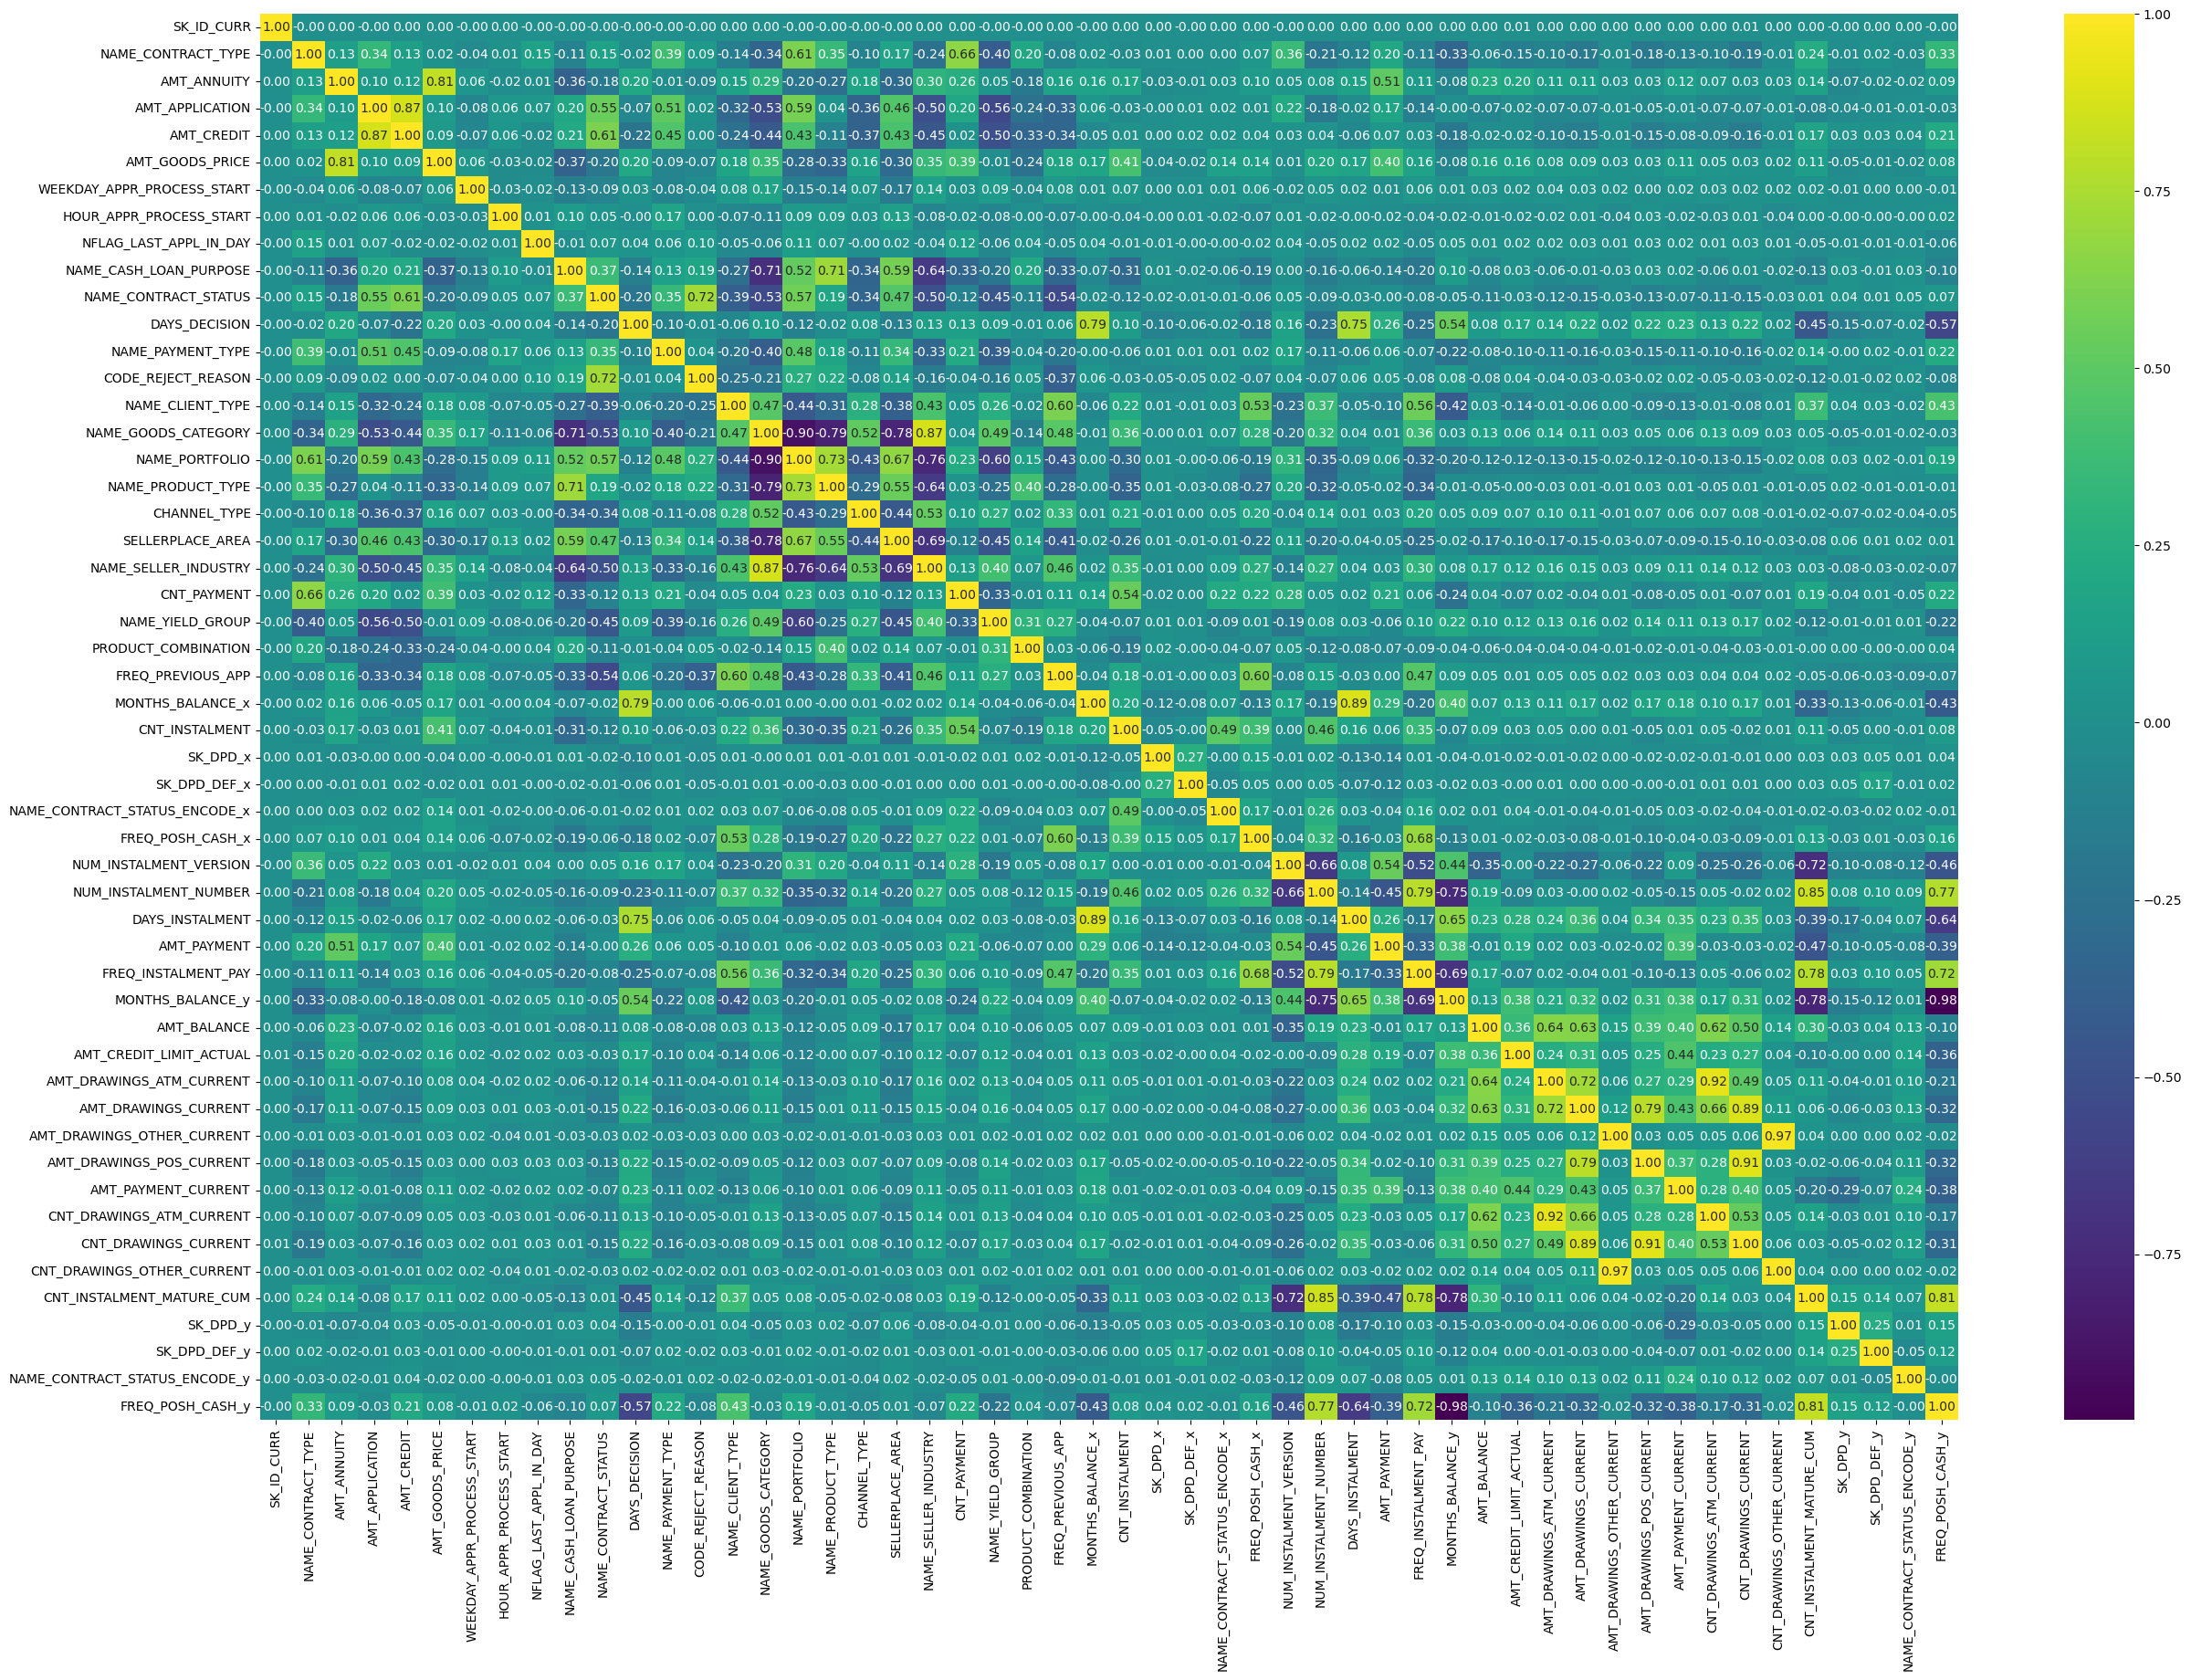

In [10]:
plt.figure(figsize=(30, 20))
sns.heatmap(merged_df.corr(), cmap='viridis', annot=True, fmt='.2f')

Menghapus kolom yang memiliki korelasi lebih atau sama dengan 0.8 karena dianggap redundan  
selain redundan, kolom kolom tersebut dapat mengurangi dimensi

In [14]:
kolom_dihapus = ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'NAME_SELLER_INDUSTRY', 'NAME_PORTFOLIO', 'DAYS_INSTALMENT', 'FREQ_POSH_CASH_y', 'CNT_DRAWINGS_ATM_CURRENT',
                 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT']

merged_df.drop(columns=kolom_dihapus, inplace=True)

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_CURR                     338857 non-null  int64  
 1   NAME_CONTRACT_TYPE             338857 non-null  float64
 2   AMT_ANNUITY                    338857 non-null  float64
 3   AMT_APPLICATION                338857 non-null  float64
 4   WEEKDAY_APPR_PROCESS_START     338857 non-null  float64
 5   HOUR_APPR_PROCESS_START        338857 non-null  float64
 6   NFLAG_LAST_APPL_IN_DAY         338857 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE         338857 non-null  float64
 8   NAME_CONTRACT_STATUS           338857 non-null  float64
 9   DAYS_DECISION                  338857 non-null  float64
 10  NAME_PAYMENT_TYPE              338857 non-null  float64
 11  CODE_REJECT_REASON             338857 non-null  float64
 12  NAME_CLIENT_TYPE              

In [16]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,338857.0,278149.909581,102879.193103,100001.000000,189061.000000,278221.000000,367302.000000,456255.000000
NAME_CONTRACT_TYPE,338857.0,0.881069,0.165280,0.000000,0.822269,0.966807,0.977871,1.000000
AMT_ANNUITY,338857.0,0.735452,0.043131,0.000000,0.710054,0.737054,0.761608,1.000000
AMT_APPLICATION,338857.0,0.633312,0.155641,0.000000,0.528755,0.687734,0.750349,1.000000
WEEKDAY_APPR_PROCESS_START,338857.0,0.844838,0.217429,0.000000,0.813967,0.934457,0.974406,1.000000
HOUR_APPR_PROCESS_START,338857.0,0.812229,0.071415,0.000000,0.778989,0.821235,0.859074,1.000000
NFLAG_LAST_APPL_IN_DAY,338857.0,0.997612,0.025147,0.000000,1.000000,1.000000,1.000000,1.000000
NAME_CASH_LOAN_PURPOSE,338857.0,0.890869,0.141357,0.000000,0.823343,0.920504,1.000000,1.000000
NAME_CONTRACT_STATUS,338857.0,0.810723,0.195313,0.000000,0.643302,0.821651,1.000000,1.000000
DAYS_DECISION,338857.0,0.931645,0.068601,0.000000,0.910015,0.955075,0.977051,1.000000


In [17]:
# Simpan DataFrame ke file CSV
merged_df.to_csv('join_previous.csv', index=False)